In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

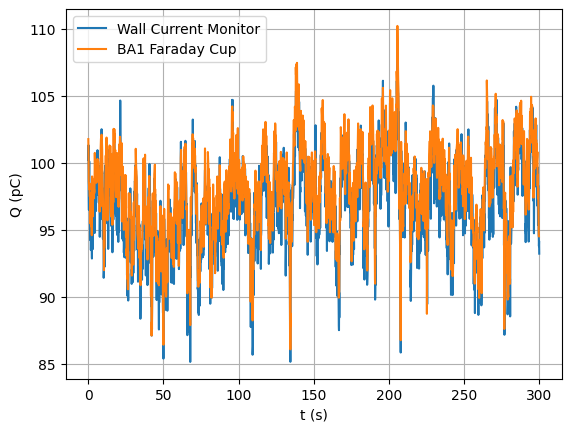

In [2]:
fromTime = datetime(2021, 10, 13, 15, 10, 0, 0)
toTime = datetime(2021, 10, 13, 15, 15, 0, 0)
PV_WCM = "CLA-S01-DIA-WCM-01:Q"
PV_FCUP = "EBT-BA1-DIA-FCUP-01:Q"

def get_scalar(PV, fromTime, toTime):
    timespec = 'milliseconds'
    url = 'http://claraserv2.dl.ac.uk:17668/retrieval/data/getData.json?pv='\
        + PV + '&from=' + fromTime.isoformat(timespec=timespec) + 'Z&to='\
        + toTime.isoformat(timespec=timespec) + 'Z' # Create URL
    r = requests.get(url) # Get data at url
    scalars = r.json() # Parse json
    values = []
    time = []

    for event in scalars[0]["data"]:
        time.append(event["secs"]+event["nanos"]*1E-9)
        values.append(event["val"])

    scalar_values = np.array(values) # Numpy array of scalar values
    scalar_times = np.array(time)
    return (scalar_values, scalar_times)

wcm_values, wcm_times = get_scalar(PV_WCM, fromTime, toTime)
fcup_values, fcup_times = get_scalar(PV_FCUP, fromTime, toTime)
i_filtering = fcup_values > 70
fcup_values = fcup_values[i_filtering]
fcup_times = fcup_times[i_filtering]

plt.plot(wcm_times-np.min(wcm_times), wcm_values)
plt.plot(fcup_times-np.min(fcup_times), fcup_values)
plt.xlabel("t (s)")
plt.ylabel("Q (pC)")
plt.legend(["Wall Current Monitor", "BA1 Faraday Cup"])
plt.grid(True)
plt.show()


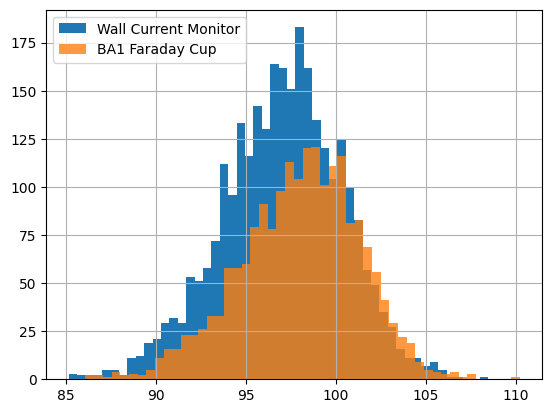

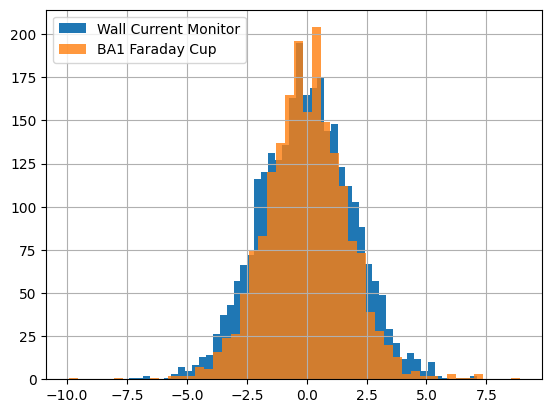

In [3]:
fig_1, ax = plt.subplots()
h1 = ax.hist(wcm_values, bins=50)
h2 = ax.hist(fcup_values, bins=50, alpha=0.8)
ax.legend(["Wall Current Monitor", "BA1 Faraday Cup"], loc='upper left')
ax.grid(True)
plt.show(fig_1)

d1_wcm = np.diff(wcm_values)
mean_d_wcm = np.mean(np.abs(d1_wcm))
d1_fcup = np.diff(fcup_values)
mean_d_fcup = np.mean(np.abs(d1_fcup))

fig_2, ax = plt.subplots()
h1 = ax.hist(d1_wcm, bins=50)
h2 = ax.hist(d1_fcup, bins=50, alpha=0.8)
ax.legend(["Wall Current Monitor", "BA1 Faraday Cup"], loc='upper left')
ax.grid(True)
plt.show(fig_2)


In [4]:
sd_wcm = np.std(wcm_values)
d1_wcm = np.diff(wcm_values)
rms_wcm = np.sqrt( np.mean( wcm_values**2 ) )

sd_fcup = np.std(fcup_values)
d1_fcup = np.diff(fcup_values)
rms_fcup = np.sqrt( np.mean( fcup_values**2 ) )

print("WCM (rms): {:.2f} pC".format(rms_wcm) )
print("BA1 Fcup (rms): {:.2f} pC".format(rms_fcup) )

print(
    "WCM (rms deviation): {:.2f} pC / {:.2f} %"\
    .format( sd_wcm, 100*sd_wcm/rms_wcm ))
print(
    "WCM (rms deviation): {:.2f} pC / {:.2f} %"\
    .format( sd_fcup, 100*sd_fcup/rms_fcup ))


print(
    "WCM Max shot-to-shot variation: {:.2f} pC / {:.2f}%".format(np.max(d1_wcm), (np.max(d1_wcm)/rms_wcm)*100 ))
print(
    "BA1 Fcup Max shot-to-shot variation: {:.2f} pC / {:.2f}%".format(np.max(d1_fcup), (np.max(d1_fcup)/rms_fcup)*100) )


WCM (rms): 97.09 pC
BA1 Fcup (rms): 98.08 pC
WCM (rms deviation): 3.34 pC / 3.44 %
WCM (rms deviation): 3.32 pC / 3.39 %
WCM Max shot-to-shot variation: 7.09 pC / 7.31%
BA1 Fcup Max shot-to-shot variation: 8.89 pC / 9.06%
